In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from __future__ import division
import sys 
sys.path.append('/Users/wandawang/Desktop')
import seaborn as sns
import datetime
import dateutil.parser
os.chdir('/Users/wandawang/Desktop')
csm = pd.read_excel('CSM Challenge_data.xlsx', header = 1)
df = csm.iloc[0:247,] #Removing Row Totals from DataFrame

In [83]:
#Clean up Date formatting and sort by least recent to most recent in a DataFrame 
df['Week'] = pd.to_datetime(df['Week'],format='%Y%m%d')
df = df.sort_values(by='Week') #non-consecutive but by month sequence 
#Add a profit column
df['Profit'] = df['Revenue']-df['Cost']

In [84]:
#Exploratory Data Analysis: Get a general sense of data
df.describe()
df.dtypes #What are the data types?
dtypes = df.dtypes #how many 0's are there?
numerical_cols = dtypes[(dtypes == 'float64') | (dtypes == 'int64')].index
num_0_values_by_col = (df[numerical_cols] == 0).sum()
num_0_values_by_col #51 No orders generated no revenue - makes sense
#15 rows with no clicks generated no cost
#list(df.columns.values)

Impressions     0
Clicks         15
Cost           15
Orders         51
Revenue        51
Profit         15
dtype: int64

Campaign Name
WP - High Priority Shopping    38000
 All Products Shopping         22500
 Google Shopping               15000
Unisex Shopping                 8000
Women's Shopping                8000
Name: Budget, dtype: int64


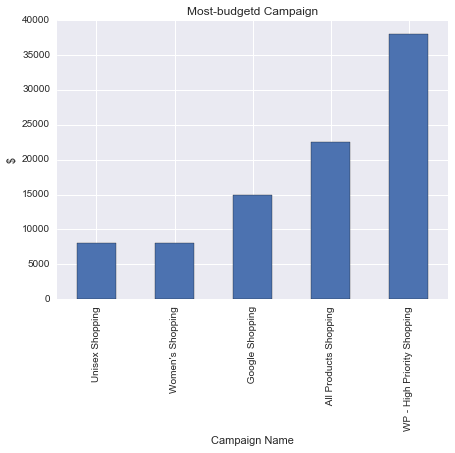

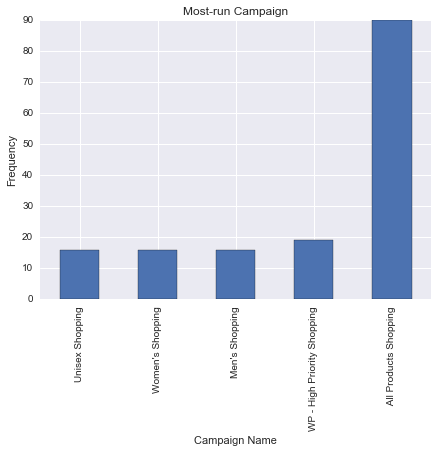

In [64]:
#How many unique weeks are being captured in total
Rev_by_wk = df.groupby('Week')['Revenue'].sum().reset_index()
Rev_by_wk.shape #95
#How many unique campaign names, types, subtypes are run?
df['Campaign Name'].nunique() #32
df['Campaign type'].nunique() #2
df['Campaign subtype'].nunique() #2

#Quick Overview
#Which campaigns have the highest budget?
plt.figure(figsize=(7,5))
budgetz = df.groupby('Campaign Name')['Budget'].sum().sort_values().nlargest(5)
print budgetz
budgetz.sort_values().plot(kind='bar')
plt.title('Most-budgetd Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('$')

#What was the most popular Campaign Name ran?
Week_Duration_per_Campaign = df.groupby('Campaign Name')['Week'].count().sort_values().nlargest(5)
#No. of Weeks per Campaign: All Products Shopping ran a whopping 90 times out of 247 
#_by_CampainName = df.groupby('Campaign Name')['Week'].count().nlargest(10)
plt.figure(figsize=(7,5))
Week_Duration_per_Campaign.sort_values().plot(kind='bar')
Week_Duration_per_Campaign
plt.title('Most-run Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Frequency')


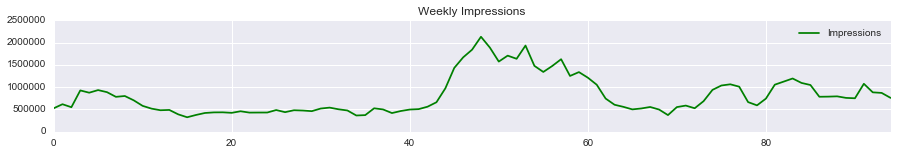

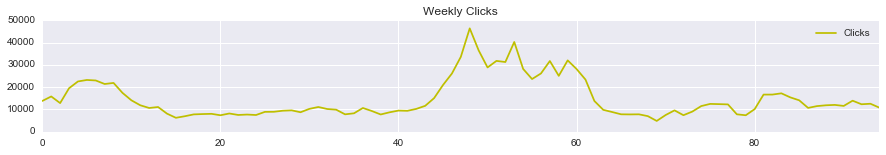

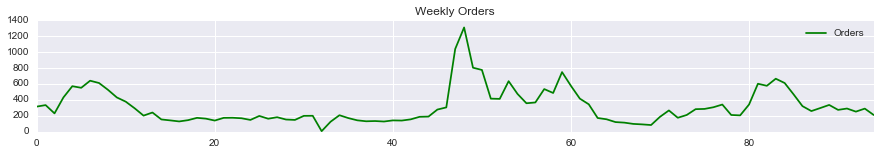

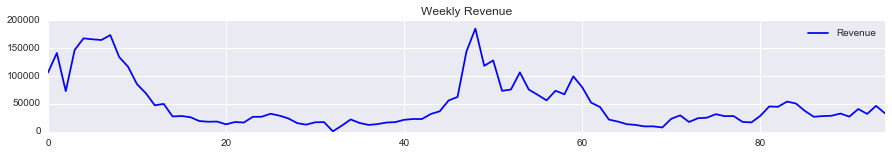

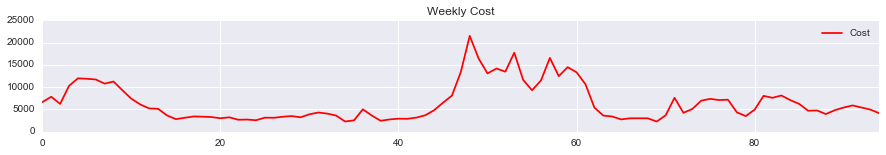

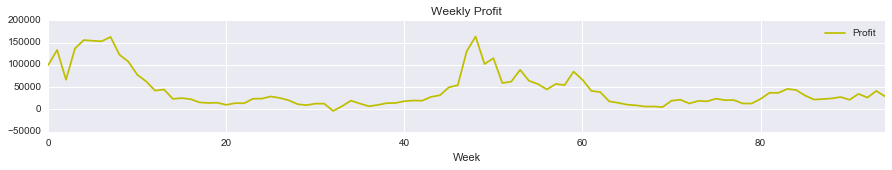

In [65]:
#Q1: #Graph a quick dashboard-like overview of metrics by week for all campaigns
Rev_by_wk = df.groupby('Week')['Revenue'].sum().reset_index()
Imps_by_wk = df.groupby('Week')['Impressions'].sum().reset_index()
Cliqs_by_wk = df.groupby('Week')['Clicks'].sum().reset_index()
Orders_by_wk = df.groupby('Week')['Orders'].sum().reset_index()
Cost_by_wk = df.groupby('Week')['Cost'].sum().reset_index()
Profit_by_wk = df.groupby('Week')['Profit'].sum().reset_index()
#Profit_by_wk = (df.groupby('Week')['Revenue'].sum()-df.groupby('Week')['Cost'].sum()).reset_index()
plt.figure()
with pd.plot_params.use('x_compat', True):
    Imps_by_wk.plot(color='g', figsize=(15,2)).set_title('Weekly Impressions')
    Cliqs_by_wk.plot(color='y', figsize=(15,2)).set_title('Weekly Clicks')
    Orders_by_wk.plot(color='g', figsize=(15,2)).set_title('Weekly Orders')
    Rev_by_wk.plot(color='b', figsize=(15,2)).set_title('Weekly Revenue')
    Cost_by_wk.plot(color='r',figsize=(15,2)).set_title('Weekly Cost')
    Profit_by_wk.plot(color='y',figsize=(15,2)).set_title('Weekly Profit')
plt.xlabel('Week')
#Number of Weeks: there's a total of 95 , 1st week is starts at 0 on the x-axis.
#Peaks at 0 to 20, 40 to 60

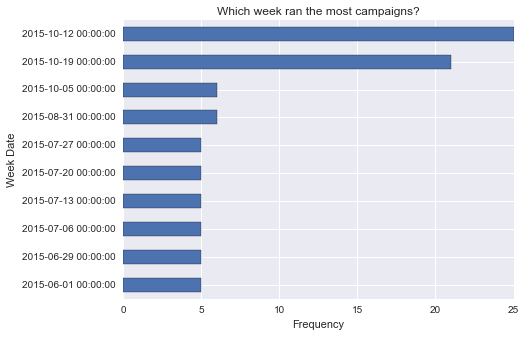

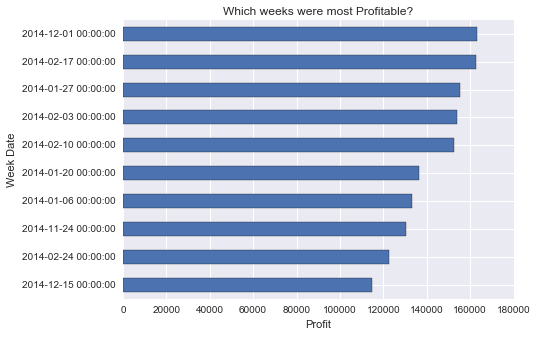

In [66]:
#No. of Campaigns per Week: Which week ran the most campaigns? 2015-10-12, 19. What campaigns were run? 
Num_of_Campaigns_per_wk = df.groupby('Week')['Campaign Name'].count().nlargest(10)
plt.figure(figsize=(7,5))
Num_of_Campaigns_per_wk.sort_values().plot(kind='barh') #top 10 #cutoff
plt.title('Which week ran the most campaigns?')
plt.xlabel('Frequency')
plt.ylabel('Week Date')

#Which week made the most money?
Profit_of_Campaigns_per_wk = df.groupby('Week')['Profit'].sum().nlargest(10)
plt.figure(figsize=(7,5))
Profit_of_Campaigns_per_wk.sort_values().plot(kind='barh') #top 10 #cutoff
plt.title('Which weeks were most Profitable?')
plt.xlabel('Profit')
plt.ylabel('Week Date')

#No clear relationship between frequency and Profitability of campaigns run.

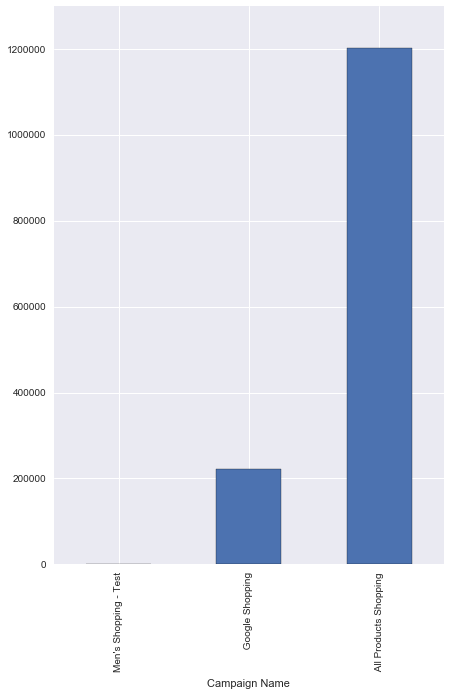

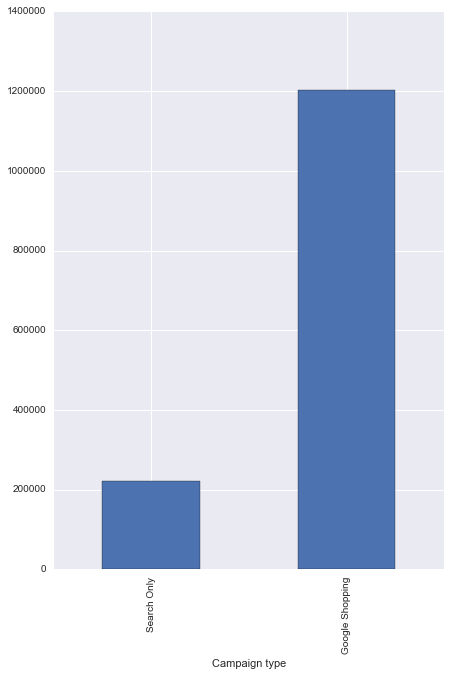

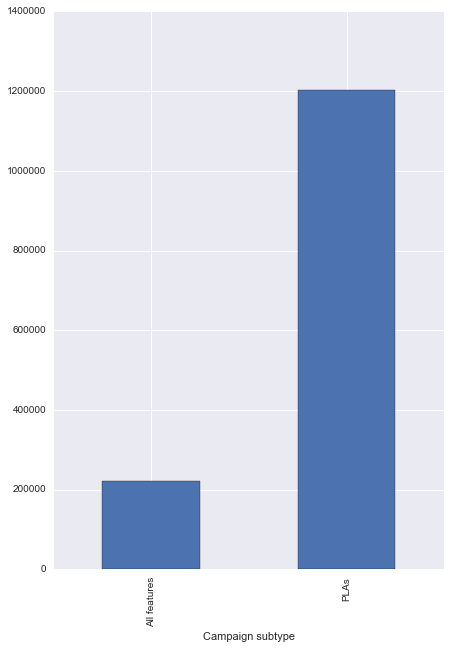

In [67]:
# Filter data for rows corresponding to the most profitable weeks
dates = Profit_of_Campaigns_per_wk.reset_index()['Week']
most_profitable_wks = df[df['Week'].isin(dates)]
quantity = most_profitable_wks.groupby('Week')['Campaign Name'].count().reset_index() #quantity
most_profitable = most_profitable_wks.groupby('Week')['Profit'].sum().reset_index()
#print quantity
#print most_profitable
#np.divide(quantity['Campaign Name']/most_profitable['Profit'], axis =0)

#total profit per campaign Name
plt.figure(figsize=(7,10))

plt.ylim((0,1300000))
most_profitable_wks.groupby('Campaign Name')['Profit'].sum().sort_values().plot(kind='bar')
plt.figure(figsize=(7,10))
#All Products Shopping is the most profitable Campaign Name

most_profitable_wks.groupby('Campaign type')['Profit'].sum().sort_values().plot(kind='bar')
#Google Shopping is the most profitable Campaign type

plt.figure(figsize=(7,10))
most_profitable_wks.groupby('Campaign subtype')['Profit'].sum().sort_values().plot(kind='bar')
#PLas are the most profitable Campaign subtype

#Week_Duration_per_Campaign = df.groupby('Campaign Name')['Week'].count().sort_values().nlargest(5)

In [68]:
#Number of Impressions, Clicks, Orders not correlated with profit

In [88]:
Avg_profit = most_profitable_wks.groupby('Campaign Name') \
                                   .agg({'Profit': np.mean}) \
                                   .reset_index() \
                .rename(columns={'Profit':'Mean_campaign_profit'})
print Avg_profit

# Tot_profit = df.groupby('Campaign Name') \
#                                     .agg({'Profit': np.sum}) \
#                                     .reset_index() \
#                                     .rename(columns={'Profit':'Tot_campaign_profit'})
# print Tot_profit
# #df vs. #most_profitable_wks dominated by All Products Shopping , Google Shopping, Mens Shopping
                                    

            Campaign Name  Mean_campaign_profit
0   All Products Shopping            120335.696
1         Google Shopping             74174.600
2   Men's Shopping - Test                -0.025


In [71]:

# plt.figure(figsize=(10,7))
# plt.scatter(categories_profit['mean_product_profit_per_unit'], # X variable
#             categories_profit['total_gross_profit'],  # Y variable
#             c=categories_profit['total_unit_sales'], # Z variable - dot color
#             cmap=plt.cm.Oranges,  # color ramp to use for dots
#             s=100)  # Size of each dot

# plt.ylim((0,100000))
# plt.xlabel('Mean Gross Profit ($)')
# plt.ylabel('Total Gross Profit ($)')
# plt.title('Mean vs. Total Profit, by Product Category')
# plt.colorbar().set_label('Total Unit Sales')

In [72]:
most_profitable_wks.head(5)

,Week,Campaign Name,Budget,Campaign type,Campaign subtype,Impressions,Clicks,Cost,Orders,Revenue,Profit
154,2014-01-06,Men's Shopping - Test,1,Google Shopping,PLAs,233,15,0.15,0,0.00,-0.15
166,2014-01-06,Google Shopping,3000,Search Only,All features,616659,15803,7837.33,335,141172.23,133334.90
0,2014-01-06,All Products Shopping,250,Google Shopping,PLAs,852,18,7.80,0,0.00,-7.80
125,2014-01-20,All Products Shopping,250,Google Shopping,PLAs,496194,11236,6022.14,232,73539.49,67517.35
245,2014-01-20,Google Shopping,3000,Search Only,All features,430698,8278,4267.30,199,73136.87,68869.57


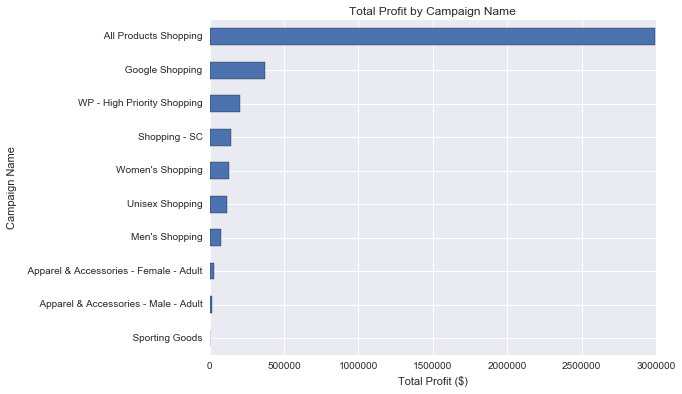

In [73]:
#Gross Profit per unit ****and Total Frequency to be mapped
#Total Profit by Campaign Name, Top 10
Profit_by_CampainName = df.groupby('Campaign Name')['Profit'].sum().nlargest(10)
plt.figure(figsize=(8,6))
Profit_by_CampainName.sort_values().plot(kind='barh')
plt.title('Total Profit by Campaign Name')
plt.xlabel('Total Profit ($)')
plt.ylabel('Campaign Name')
#All Products Shopping dominates by far, also is the most run campaign
#Revenue per campain per run 

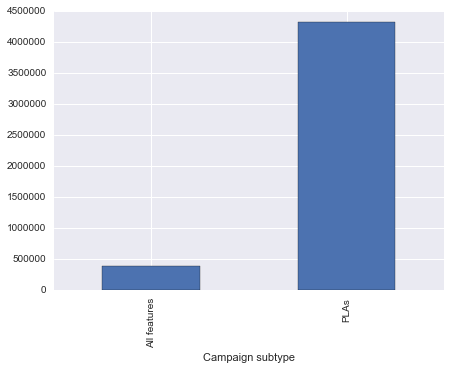

In [74]:
Revenue_by_CampaignName = df.groupby('Campaign subtype')['Revenue'].sum()
plt.figure(figsize=(7,5))
Revenue_by_CampaignName.sort_values().plot(kind='bar')

In [75]:
#Spike from week 0 to 20 (lower cost relative to rev)
#,and week 40 to week 60 -> Examine further

csm.head(2)#.group_by['Campaign type']

,Week,Campaign Name,Budget,Campaign type,Campaign subtype,Impressions,Clicks,Cost,Orders,Revenue
0,2014-01-06 00:00:00,All Products Shopping,250,Google Shopping,PLAs,852,18,7.80,0,0.00
1,2014-03-17 00:00:00,All Products Shopping,250,Google Shopping,PLAs,519015,11888,6129.15,295,69070.82


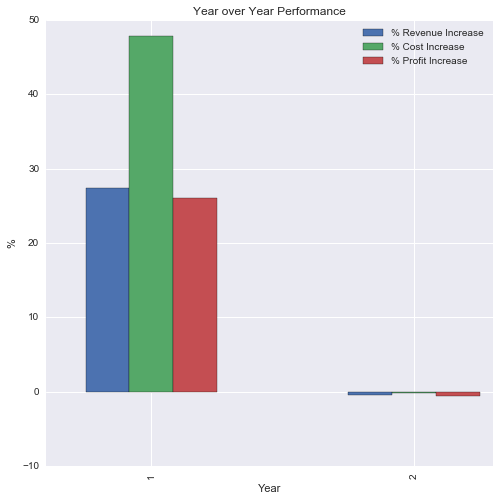

In [79]:
#Q2: Create a visual or visuals to show the trends in the cost and revenue
#variables so that one could get a glimpse into year-over-year performance.

#Note: A complete year's worth of data is only available for 2014. 
#2015's Nov and Dec data is not available for a comp.
#Refer to monthly analysis 

Rev_by_Yr = df.set_index('Week')['Revenue'].resample('AS').sum() #AS pulls by year beg. 
YoY = Rev_by_Yr.pct_change().reset_index().rename(columns={'Week':'Year','Revenue':'% Revenue Increase'}) 
Cost_by_Yr = df.set_index('Week')['Cost'].resample('AS').sum() 
CostYoY = Cost_by_Yr.pct_change().reset_index().rename(columns={'Week':'Year','Cost':'% Cost Increase'}) 
Profit_by_Yr = Rev_by_Yr - Cost_by_Yr
pYoY = Profit_by_Yr.pct_change().reset_index().rename(columns={'Week':'Year',0:'% Profit Increase'})
pd.concat([YoY, CostYoY, pYoY], axis = 1).plot.bar(figsize=(8,8)).set_xlim(0.6,2.3)
plt.title('Year over Year Performance')
plt.xlabel('Year')
plt.ylabel('%')



#By Campaign Name, Campaign Length, Campaign type, Campaign subtype
#Compare month/year by month/year

In [80]:
print YoY
print CostYoY

        Year  % Revenue Increase
0 2013-01-01                 NaN
1 2014-01-01           27.394081
2 2015-01-01           -0.463399
        Year  % Cost Increase
0 2013-01-01              NaN
1 2014-01-01        47.846840
2 2015-01-01        -0.113698


97.8389859849
2.86343204128 0.0579756531331 133.044441136


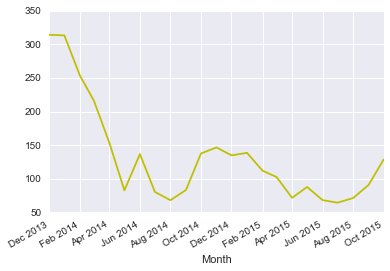

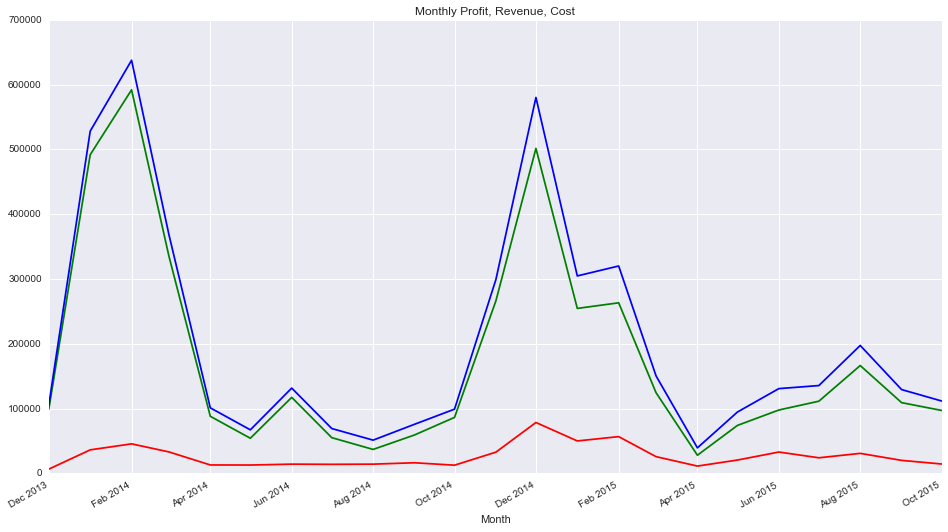

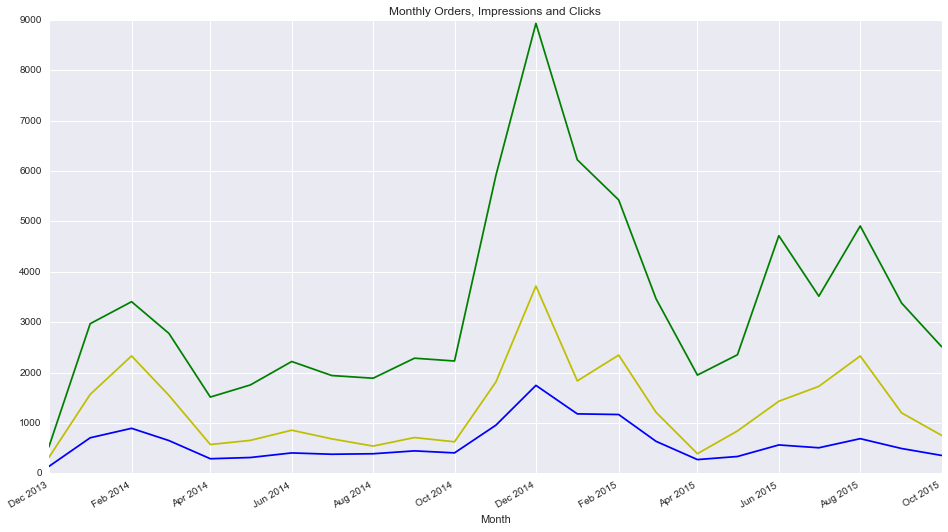

In [81]:
#Overall Trend is the same - consolidate into a monthly View
#Aggregate Revenue, Cost, Impressions, Clicks, and Profit by Week
#Fix this.... resample('M')
Rev_by_Month = df.set_index(df.Week)['Revenue'].resample('MS').sum()
Cost_by_Month = df.set_index(df.Week)['Cost'].resample('MS').sum()
Imps_by_Month = df.set_index('Week')['Impressions'].resample('MS').sum()/1000
Clicks_by_Month  = df.set_index('Week')['Clicks'].resample('MS').sum()/100
Orders_by_Month = df.set_index('Week')['Orders'].resample('MS').sum()
Profit_by_Month= Rev_by_Month - Cost_by_Month
Budget_by_Month = df.set_index('Week')['Budget'].resample('MS').sum()

Profit_per_DollarBudgeted = Profit_by_Month/Budget_by_Month #Profit/Dollar
Profit_per_Click = Profit_by_Month/df.set_index('Week')['Clicks'].resample('MS').sum() #Profit/Click
Profit_per_Imp = Profit_by_Month/df.set_index('Week')['Impressions'].resample('MS').sum() #Profit/Impression
Profit_per_Order = Profit_by_Month/Orders_by_Month  #Profit/Order

print Profit_per_DollarBudgeted.mean()
print Profit_per_Click.mean(),Profit_per_Imp.mean(), Profit_per_Order.mean()

plt.figure()
with pd.plot_params.use('x_compat', True):
    #Profit_per_Click.plot(color='g', figsize=(16,9 )).set_title('Monthly Profit per Click, Impression, Order')
    #Profit_per_Imp.plot(color='b')
    Profit_per_Order.plot(color='y')  
axes = plt.gca()
plt.xlabel('Month')
#compared to average

Rev_by_Month.shape #23 total Months
#Plot Monthly 
plt.figure()
with pd.plot_params.use('x_compat', True):
    Profit_by_Month.plot(color='g', figsize=(16,9 )).set_title('Monthly Profit, Revenue, Cost')
    Rev_by_Month.plot(color='b')
    Cost_by_Month.plot(color='r')  
axes = plt.gca()
plt.xlabel('Month')
#axes.set_ylim([0,190000])


plt.figure()
with pd.plot_params.use('x_compat', True):
    Imps_by_Month.plot(color='g', figsize=(16, 9)).set_title('Monthly Orders, Impressions and Clicks')
    Clicks_by_Month.plot(color='b')
    Orders_by_Month.plot(color='y')
axes = plt.gca()
plt.xlabel('Month')



In [ ]:
#Q3 Using your work from parts 1 & 2, project cost and revenue numbers for the next 10 wks. 
#Use forecast library in R 

In [ ]:
#Q4
#Profit per Order by Campaign 
#Profit per Impression
#Profit per Click
#Question of Seasonality
#Mar 2014 vs. Mar 2015 - What was different?
#What are the best campaigns? 

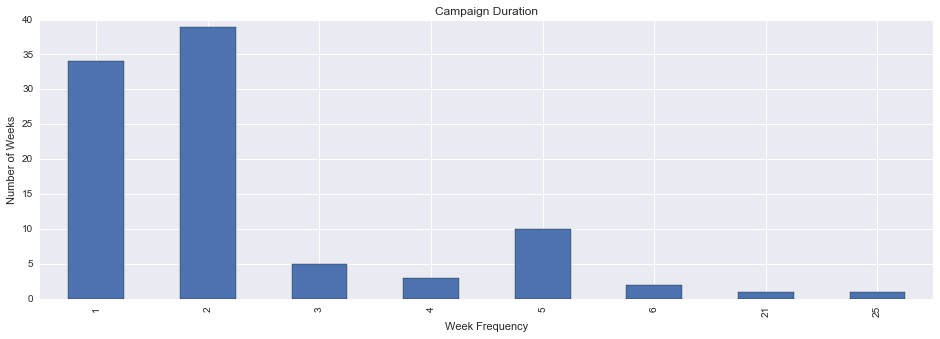

In [82]:
#0
#Aggregate by Week
wk = df.groupby('Week').size().clip(upper=80)
plt.figure(figsize=(16,5))
wk.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Week Frequency')
plt.ylabel('Number of Weeks')
plt.title('Campaign Duration')
#Most camapigns run 1 to 2 weeks. few run 21 or 25 weeks
#which ones?

In [ ]:
#Create ann. periods from 12/2013-12/2014,1/2014-1/2015, until 10/2014-10/2015.
#print Rev_by_Month

#For a fair comparison, should compare from 12/2013 to 12/2014, 1/2014 to 1/2015, until 10/2014 to 10/2015.
#Need to create this annual interval data from monthly
# Sum and then take % difference

# first = Rev_by_Month[:-12]['Revenue'].astype('int')
# second = Rev_by_Month[12:]['Revenue'].astype('int')
# firsthalf = Rev_by_Month[:-12]['Week']
# secondhalf = Rev_by_Month[12:]['Week']
# perc_change = np.divide(second,first)-1
# print perc_change #just indicates 12/2013 to 12/2014 had the most change. 
# #what drove revenue here

# import pandas as pd
# #print Rev_by_Yr
# Rev_by_Month = df.set_index(df.Week)['Revenue'].resample('MS').sum()
# Rev_by_Month = Rev_by_Month.reset_index()
# six_Month = Rev_by_Month.set_index('Week').groupby(pd.TimeGrouper(freq='6M')).aggregate(np.sum)
#print six_Month
#SPY_GroupedDat = Rev_by_Month.groupby(pd.TimeGrouper('A'))
#Rev_by_Month["YTD"] = SPY_GroupedDat['Adj Close'].transform(lambda x: x/x.iloc[0]-1.0)